Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

EX01. Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu. També adjunt trobaràs una descripció de les diferents variables del dataset.

In [2]:
import pandas as pd

In [32]:
print(open('housing data description.txt').read())

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

Arriba tenemos una descripción teórica de los datos, estudiamos diversas variables de las viviendas en distintos los suburbios de Boston en los años 70 (MEDV). Tales como la tasa de crímenes, si está junto al río o no, nivel de accesibilidad a las autopistas, % de población de clase baja, distancia a los centros de empleo de Boston, precio mediano de las viviendas ...

In [4]:
columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
viviendas = pd.read_csv('housing data.csv', sep=',', names=columnas)
pd.set_option('display.width', 120)
print(viviendas)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0     21.0  

Leemos los datos de un archivo csv, separados por comas, agregando los títulos de las columnas de acuerdo con la información previa y aumentando el espacio de la fila a 120 para visualizar todas las columnas en la misma.

In [5]:
print(viviendas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


Comprobamos como los datos de todas las filas de todas las columnas son de tipo númerico y no nulo.

In [6]:
print(viviendas[viviendas.isnull().any(axis=1)])

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []


Efectivamente obtenemos una serie vacía cuando tratamos de visualizar las filas que contengan al menos un valor nulo.

Una vez hechas las comprobaciones anteriores, ya podemos separar los datos en dos subconjuntos: train y test.

In [7]:
from sklearn.model_selection import train_test_split

Importamos de la librería sklearn.model_selection el método necesario train_test_split ...

In [8]:
train, test = train_test_split(viviendas, test_size=0.20)

Dividimos nuestros datos en dos grupos, utilizando el método train_test_split(): train y test, con un 80% de las observaciones para train y un 20% para test.

In [9]:
print(train.shape)
print(test.shape)

(404, 14)
(102, 14)


Comprobamos como en total, entre train (404) y shape (102), tenemos 506 registros, con 14 columnas cada uno, que era el total, el 80% para train y el 20% para test, tal y como le hemos pedido al método (test_size=0.20).

Vamos con la descripción estadística de train:

In [10]:
print(train.describe().round(2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX  PTRATIO       B   LSTAT    MEDV
count  404.00  404.00  404.00  404.00  404.00  404.00  404.00  404.00  404.00  404.00   404.00  404.00  404.00  404.00
mean     3.54   10.64   11.16    0.07    0.55    6.28   69.15    3.79    9.47  407.02    18.48  355.27   12.57   22.56
std      8.81   22.18    6.74    0.25    0.12    0.69   27.74    2.07    8.68  167.50     2.14   93.02    6.95    9.19
min      0.01    0.00    0.46    0.00    0.39    3.56    2.90    1.13    1.00  188.00    12.60    0.32    1.73    5.00
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.55    2.11    4.00  279.00    17.40  374.24    6.99   17.20
50%      0.26    0.00    9.69    0.00    0.54    6.19   78.40    3.24    5.00  330.00    19.00  391.24   11.36   21.20
75%      3.68   12.50   18.10    0.00    0.62    6.60   94.02    5.12   24.00  666.00    20.20  396.08   16.94   24.85
max     88.98  100.00   27.74    1.00    0.87   

Y test ...

In [11]:
print(test.describe().round(2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX  PTRATIO       B   LSTAT    MEDV
count  102.00  102.00  102.00  102.00  102.00  102.00  102.00  102.00  102.00  102.00   102.00  102.00  102.00  102.00
mean     3.91   14.23   11.06    0.08    0.56    6.30   66.29    3.82    9.88  413.05    18.37  362.25   12.98   22.43
std      7.73   27.31    7.35    0.27    0.12    0.77   29.75    2.26    8.85  173.34     2.26   84.31    7.87    9.27
min      0.02    0.00    1.21    0.00    0.38    4.14    6.20    1.14    1.00  187.00    12.60   27.49    3.11    5.00
25%      0.07    0.00    4.49    0.00    0.45    5.86   39.28    2.06    4.00  280.25    17.00  378.46    7.00   15.72
50%      0.28    0.00    8.91    0.00    0.54    6.24   73.45    2.95    5.00  346.50    19.10  392.35   11.63   20.70
75%      3.64   20.00   18.10    0.00    0.65    6.71   94.05    5.37   24.00  666.00    20.20  396.90   17.14   26.55
max     45.75   95.00   27.74    1.00    0.87   

Comprobamos como efectivamente, los parámetros de centralización y dispersión entre ambos subconjuntos son parecidos, pero no idénticos, por ejemplo en la tasa de criminalidad las medias están en 3.42 y 4.39, respectivamente, las desviaciones típicas 7.29 y 12.52, el mínimo es igual, el máximo 67.92 y 88.98, y la mediana en 0.24 y 0.26 ...

EX02. Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Hay varias columnas candidatas a ser estandarizadas:
CRIM y ZN: por la diferencia entre el máximo y la media y tener una desviación típica elevada en relación con la media.
INDUS, NOX, RM, AGE, DIS, TAX, B, con escalas y rangos muy distintos entre sí.
RAD y TAX por tener rangos amplios.

Entonces ...

In [12]:
viviendas_est = viviendas.copy()

Comenzamos haciendo una copia del dataset original, en la cual estandarizaremos las variables citadas arriba.

In [13]:
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'RAD']

for x in cols:
  viviendas_est[x] = (viviendas_est[x]-viviendas_est[x].mean())/viviendas_est[x].std()

Una pequeña muestra:

In [14]:
print(viviendas_est.sample(5).round(2))

     CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO     B  LSTAT  MEDV
69  -0.41  0.05  -0.74     0 -1.26 -0.57 -1.26  1.28 -0.64 -0.38     18.9  0.44   8.79  20.9
265 -0.33  0.37  -1.04     0  0.80 -1.03 -0.21 -0.86 -0.52 -0.86     13.0  0.39  10.45  22.8
191 -0.41  1.44  -1.12     0 -1.02  0.65 -1.34  1.27 -0.52 -0.06     15.2  0.36   4.69  30.5
375  1.86 -0.49   1.01     0  1.00  1.46  1.04 -1.18  1.66  1.53     20.2  0.44  13.44  15.0
274 -0.41  1.23  -0.69     1 -0.93  0.67 -1.27  0.13 -0.64 -0.92     17.6  0.44   3.53  32.4


Hay dos variables sobre las que no hemos aplicado estandarización que son buenas candidatas para una transformación polinómica: LSTAT (lower status) y PTRATIO (pupil - teacher ratio). La aplicaremos en la primera como ejemplo:

In [15]:
from sklearn.preprocessing import PolynomialFeatures

Antes de aplicar la transformación polinomial a LSTAT también la estandarizaremos, para obtener valores más similares al resto (que no presenten un problema de escala).

In [16]:
viviendas['LSTAT'] = (viviendas['LSTAT'] - viviendas['LSTAT'].mean())/viviendas['LSTAT'].std()

In [17]:
lstat = viviendas['LSTAT'].values.reshape(-1, 1)
poli = PolynomialFeatures(degree=3, interaction_only=False)
lstat_poli = poli.fit_transform(lstat)
print(lstat_poli)

[[ 1.         -1.07449897  1.15454804 -1.24056068]
 [ 1.         -0.49195252  0.24201729 -0.11906102]
 [ 1.         -1.20753241  1.45813453 -1.76074471]
 ...
 [ 1.         -0.98207574  0.96447275 -0.94718529]
 [ 1.         -0.86444617  0.74726717 -0.64597224]
 [ 1.         -0.66839688  0.44675439 -0.29860924]]


Generamos la variable polinomial de grado 3, que nos muestra: 1, x, x al cuadrado y x al cubo. La tenemos guardada en lstat_poli. Vamos a incluir solamente la columna de grado 3 en el dataset estandarizado.

In [18]:
viviendas_est['LSTAT'] = lstat_poli[:, 3]

Ahora ya tenemos la columna con la variable LSTAT elevada al cubo (polinómica) en una nueva columna del dataset estandarizado (viviendas_est).

In [19]:
print(viviendas['RAD'].value_counts())

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64


Podríamos considerar crear una variable Dummy para RAD, que presenta un número discreto de posibilidades (entre 1 y 24), pero tampoco tendría mucho sentido, en tanto son valores que responden a un índice 'ordenado', es decir, no se trata de una variable estrictamente categórica.  
Con lo cual, todas las transformaciones que teniamos pensado hacer ya están hechas y guardadas en viviendas_est.

EX03. Resumeix les noves columnes generades de manera estadística i gràfica.

In [20]:
print(viviendas_est.describe().round(2).drop(columns=['CHAS', 'MEDV', 'PTRATIO']))

         CRIM      ZN   INDUS     NOX      RM     AGE     DIS     RAD     TAX       B   LSTAT
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00
mean    -0.00    0.00    0.00   -0.00   -0.00   -0.00   -0.00    0.00    0.00   -0.00    0.90
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    4.65
min     -0.42   -0.49   -1.56   -1.46   -3.88   -2.33   -1.27   -0.98   -1.31   -3.90   -3.58
25%     -0.41   -0.49   -0.87   -0.91   -0.57   -0.84   -0.80   -0.64   -0.77    0.20   -0.51
50%     -0.39   -0.49   -0.21   -0.14   -0.11    0.32   -0.28   -0.52   -0.46    0.38   -0.01
75%      0.01    0.05    1.01    0.60    0.48    0.91    0.66    1.66    1.53    0.43    0.22
max      9.92    3.80    2.42    2.73    3.55    1.12    3.96    1.66    1.80    0.44   44.56


Estadísticamente, las variables, al haberlas estandarizado, tienen una media en 0 y una desviación típica de 1. Las medianas en general están próximas a 1, y el rango entre los cuartiles 1 y 3 entre 1 y 3 en la mayoría de los casos, y entre máximo y mínimo entre 0 y 5. Hay poca información realmente relevante que podamos extraer de aquí.

Aquí lo interesante sería calcular las correlaciones entre las distintas columnas para ver la relación existentes. Aunque no hemos transformado ni MEDV ni PTRATIO, consideramos interesante incluirlas aquí, especialmente MEDV, que podríamos considerar la variable dependiente (precio de la vivienda).

In [21]:
print(viviendas_est.drop(columns=['CHAS']).corr().round(2))

         CRIM    ZN  INDUS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29 -0.39   0.37 -0.39
ZN      -0.20  1.00  -0.53 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39  0.18  -0.20  0.36
INDUS    0.41 -0.53   1.00  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38 -0.36   0.32 -0.48
NOX      0.42 -0.52   0.76  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19 -0.38   0.33 -0.43
RM      -0.22  0.31  -0.39 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36  0.13  -0.47  0.70
AGE      0.35 -0.57   0.64  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26 -0.27   0.31 -0.38
DIS     -0.38  0.66  -0.71 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23  0.29  -0.29  0.25
RAD      0.63 -0.31   0.60  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46 -0.44   0.29 -0.38
TAX      0.58 -0.31   0.72  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46 -0.44   0.31 -0.47
PTRATIO  0.29 -0.39   0.38  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00 -0.18   0.18 -0.51

A nivel de correlaciones, en general son débiles, pero la que más correlacionada está con el precio de la vivienda es RM, claro, el número de habitaciones. PT ratio, que era la otra variable que no habíamos estandarizado, parece estar más correlacionada con MEDV que las demás, cuanto más cara es la vivienda, más baja es la ratio alumno - profesor, lo que tiene sentido (el Estado intenta compensar ...). Pero esto nos lleva a comprobar las correlaciones con las variables desestandarizadas.

In [22]:
print(viviendas.corr().round(2))

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46 -0.44   0.49 -0.38
TAX      0.58 -0.31   0.72 -0.

Aquí encontramos otra correlación negativa alta, que es entre el índice del estatus de la población y el precio, a más bajo el índice (mayor estatus), más alto es el precio de la vivienda.

Hasta aquí lo que podríamos decir es que la estandarización que hemos aplicado realmente no nos ha servido para encontrar mayores relaciones / dependencias entre unas variables y otras, por lo tanto parece no existir un problema de escala y en general las variables están débilmente correlacionadas entre sí de forma individual.

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

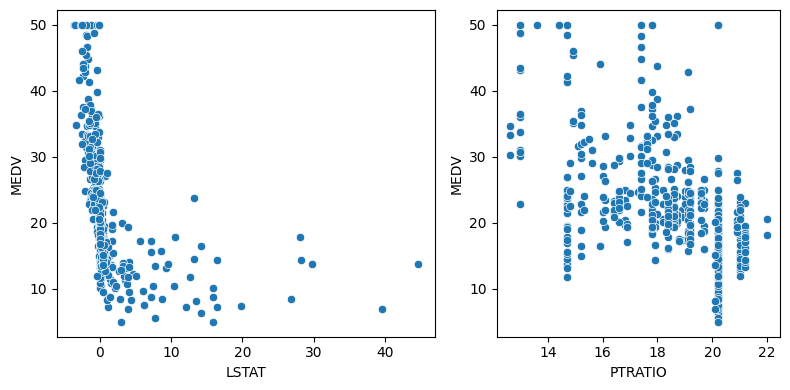

In [31]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=viviendas_est, x="LSTAT", y="MEDV", ax=axs[0])
sns.scatterplot(data=viviendas_est, x="PTRATIO", y="MEDV", ax=axs[1])
f.tight_layout()

Comenzamos mostrando dos diagramas de puntos que relacionan LSTAT y PTRATIO con MEDV. Eran las dos variables que presentaban una correlación mayor. Gráficamente sí se observa una correlación negativa, aunque dista de ser lineal. Lo que sí parece claro es que a medida que baja el status general de la población, también baja el precio de la vivienda. La mayoría de puntos se agrupan en porcentajes bajos de bajo estatus, y ahí el rango de precios sí es muy diverso, por lo que deberían ser otras variables las que explicaran la diferencia de precios.  
En el caso de PTRATIO estandarizada si hay alguna tendencia negativa de nuevo, pero débil, los puntos están muy dispersos.

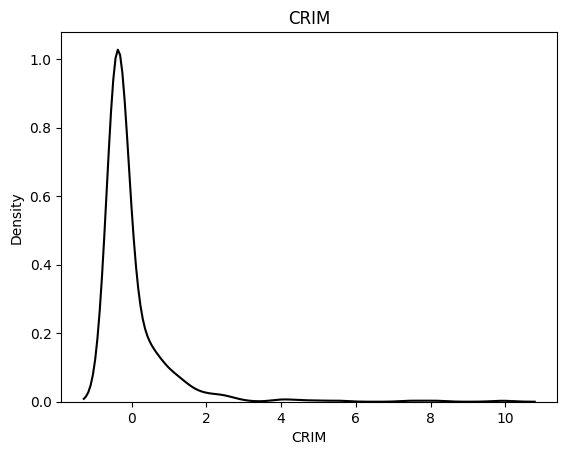

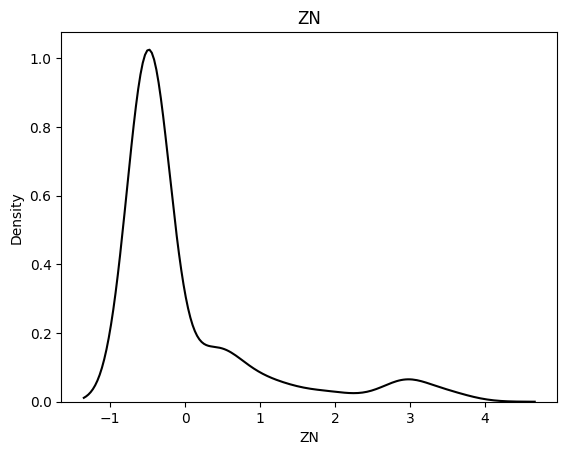

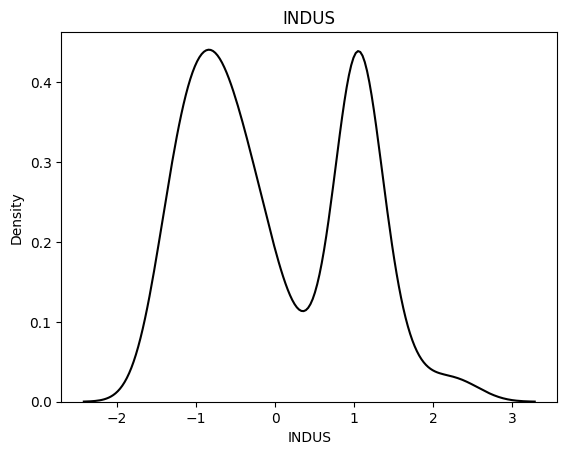

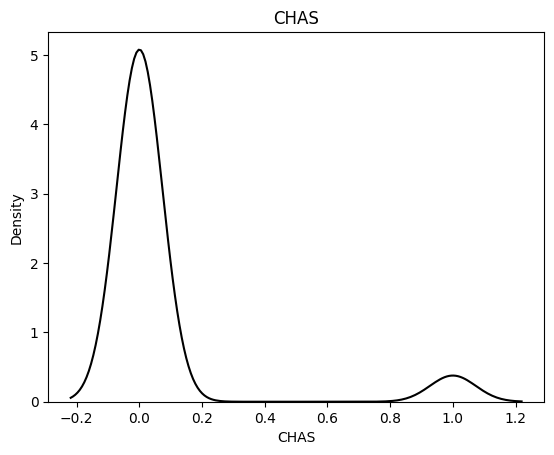

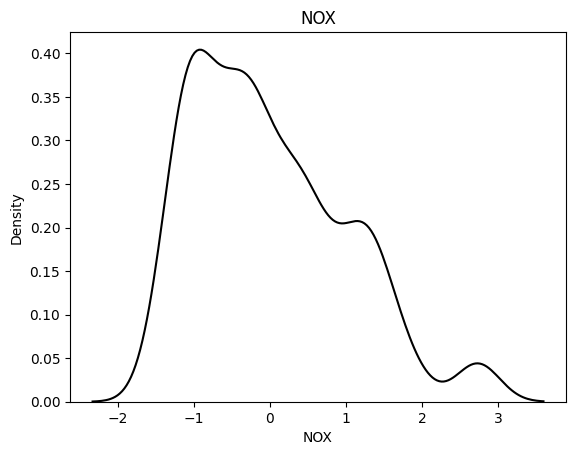

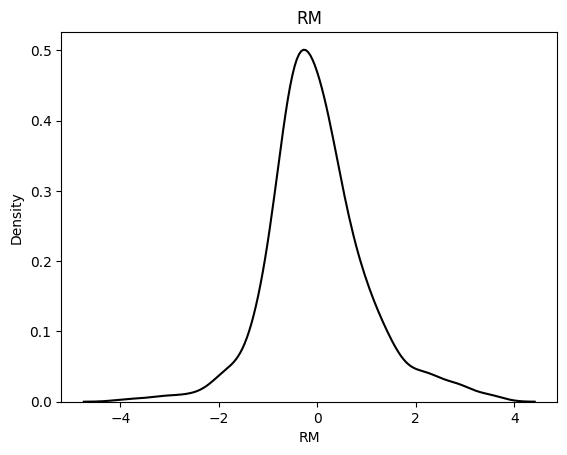

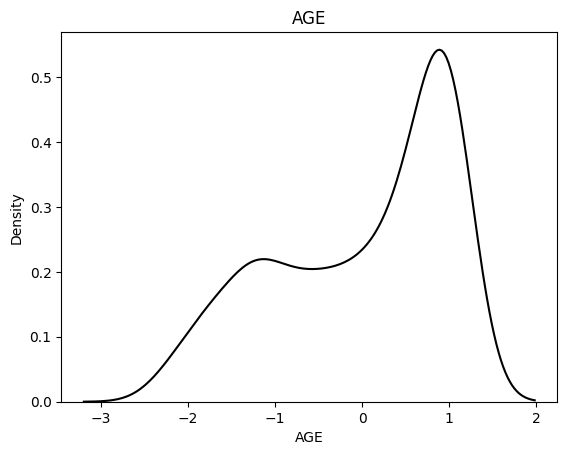

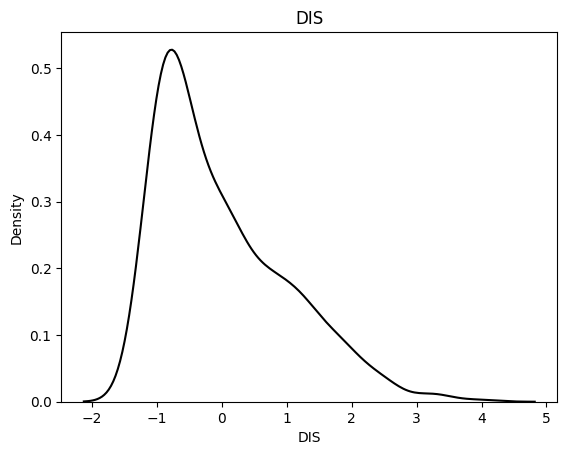

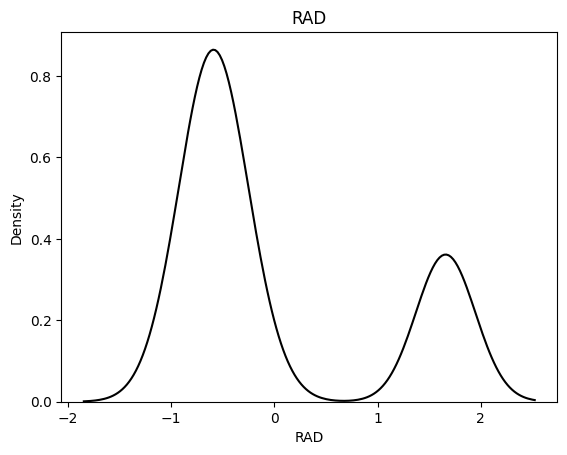

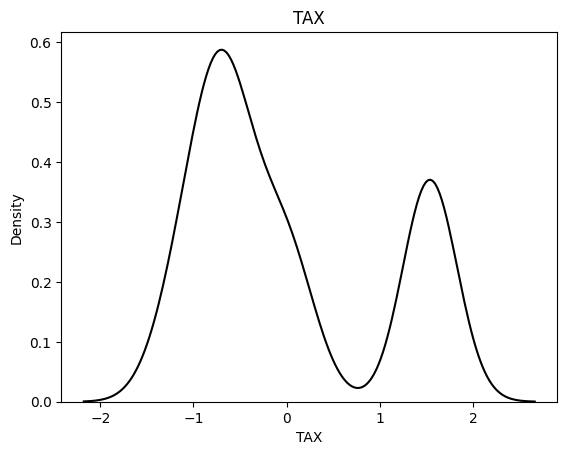

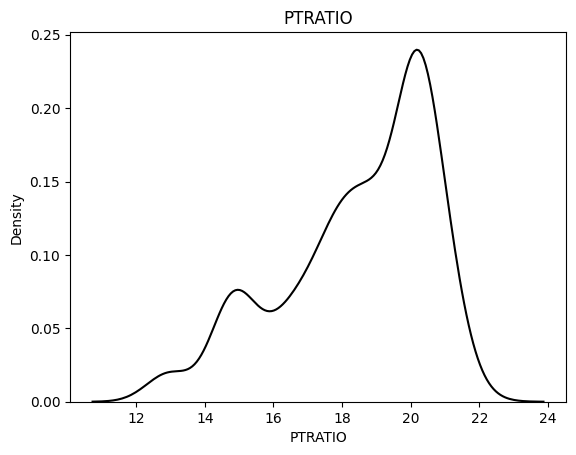

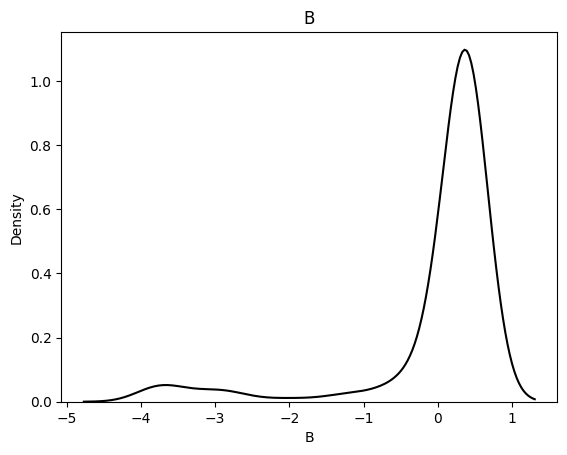

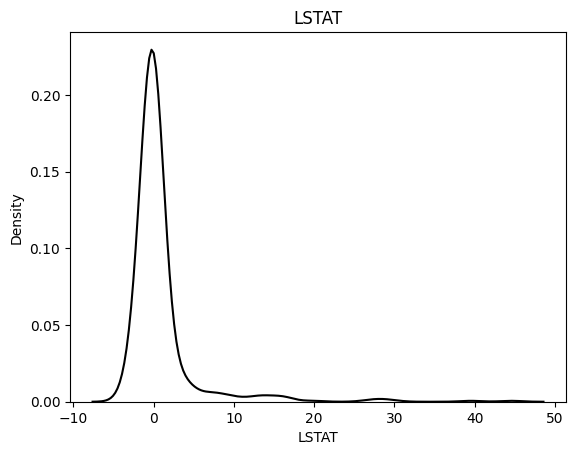

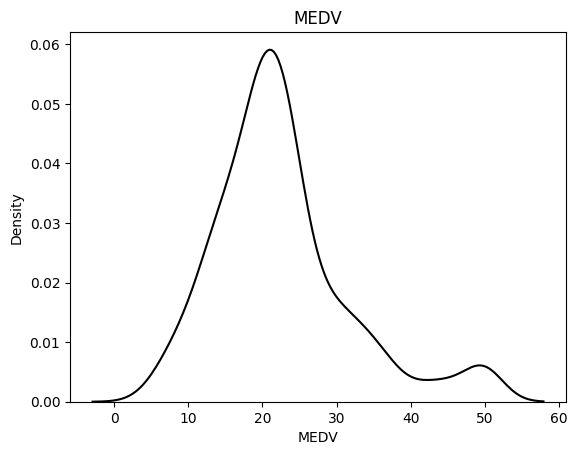

In [42]:
for x in viviendas_est:
  sns.kdeplot(viviendas_est[x], color = 'black')
  plt.title(x)
  plt.show()

Aquí podemos ver la distribución de las variables estandarizadas, como se observa, con la media entorno a 0 (excepto en MEDV) y distribuciones aproximadamente normales.

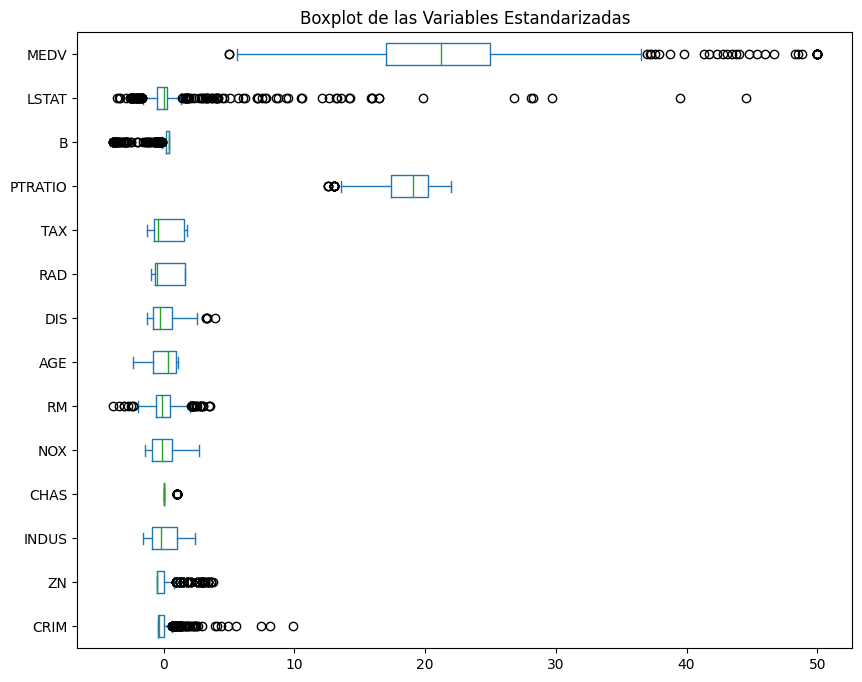

In [40]:
viviendas_est.plot(kind='box', vert=False, figsize=(10, 8))
plt.title('Boxplot de las Variables Estandarizadas')
plt.show()

Y aquí los respectivos diagramas de caja.